## **# Linear Regression: House Price Prediction**

**# Step 1: Problem Understanding**

The goal of this project is to predict the median house price using numerical
features such as income, house age, number of rooms, population, and location.

Since the target variable is a continuous value, this problem is treated as a
Supervised Machine Learning Regression task. Linear Regression is used as the
baseline model to understand the relationship between features and house prices.

## **DATASET LOADING & UNDERSTANDING**

In this step, we load the **California Housing dataset** and perform an initial inspection to understand its structure, size, and feature types.
This helps ensure the data is correctly loaded and ready for further analysis and preprocessing.

In [1]:
import pandas as pd

# Load training and testing datasets
train_df = pd.read_csv("/content/california_housing_train.csv")
test_df = pd.read_csv("/content/california_housing_test.csv")

# Check dataset shape
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

# View first few rows
train_df.head()


Train data shape: (16512, 10)
Test data shape: (4128, 10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerHousehold,MedHouseVal
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.359130,1.030
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,2.573820,3.821
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,2.073224,1.726
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,1.002116,0.934
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,2.725400,0.965


## **EXPLORATORY DATA ANALYSIS (EDA)**


The dataset contains **16,512 rows and 10 numerical features**.
There are **no missing values**, and all columns are of type float, making the data clean and ready for modeling.

In [2]:
# Basic information about the dataset
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MedInc             16512 non-null  float64
 1   HouseAge           16512 non-null  float64
 2   AveRooms           16512 non-null  float64
 3   AveBedrms          16512 non-null  float64
 4   Population         16512 non-null  float64
 5   AveOccup           16512 non-null  float64
 6   Latitude           16512 non-null  float64
 7   Longitude          16512 non-null  float64
 8   RoomsPerHousehold  16512 non-null  float64
 9   MedHouseVal        16512 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


## **Statistical Summary**

The summary shows that features have different value ranges (e.g., income, population, location).
The **target variable MedHouseVal is continuous**, confirming this as a **regression problem**.

In [3]:
# Statistical summary
train_df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerHousehold,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.781731,28.608285,5.284131,1.059799,1346.120319,2.888505,35.643149,-119.582290,1.909335,2.071947
std,1.593392,12.602499,1.185110,0.088062,784.480724,0.669714,2.136665,2.005654,0.564436,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.002547,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.526243,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.941541,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.300615,2.651250
max,7.310800,52.000000,7.645946,1.276685,3282.450000,4.333333,41.950000,-114.310000,2.923847,5.000010


## **FEATURE & TARGET SEPARATION**

**Features (X)**: All input variables used to predict house price

**Target (y):** MedHouseVal (median house value)

**We separate features and target to:**

Train the model using inputs (X)

Learn to predict the output (y)

**Result:**

**Training data:** 16,512 samples, 9 features

**Testing data**: 4,128 samples, 9 features

This confirms the data is correctly prepared for model training.

In [4]:
# Separate features and target for training data
X_train = train_df.drop("MedHouseVal", axis=1)
y_train = train_df["MedHouseVal"]

# Separate features and target for testing data
X_test = test_df.drop("MedHouseVal", axis=1)
y_test = test_df["MedHouseVal"]

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 9)
y_train shape: (16512,)
X_test shape: (4128, 9)
y_test shape: (4128,)


## **FEATURE SCALING**

Features have different value ranges (e.g., income vs latitude)

Scaling ensures all features **contribute equally to the model**

StandardScaler is used to **convert features to the same scale**

We fit the scaler only on training data to **avoid data leakage** and apply the same transformation to test data.

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)


## **LINEAR REGRESSION MODEL TRAINING**

We use **Linear Regression** as a baseline model for house price prediction

It learns the **linear relationship between input features and house prices**

Training means the model finds the best coefficients to minimize prediction error

After training, the model is **ready to predict** prices on unseen data.

In [6]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

## **MODEL PREDICTION**

The **trained Linear Regression** model is used to predict house prices on unseen (test) data.

These values represent the **predicted median house prices based on input features.**

Checking a few predictions **helps verify that the model is producing reasonable outputs.**

In [7]:
# Predict on test data
y_pred = lr_model.predict(X_test_scaled)

# View first 5 predictions
y_pred[:5]


array([0.30440955, 1.86358685, 3.90630751, 2.70658065, 2.69028997])

## **MODEL EVALUATION**

We evaluate the model using **MAE, MSE, RMSE, and R² score.**

These metrics help us understand **how close predictions** are to **actual values.**

**R²** shows how well the model explains the data (closer to 1 is better).

**Result:**

The model shows **good predictive performance** for a baseline Linear Regression.

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.5015980660288143
MSE: 0.4643649955722796
RMSE: 0.6814433179452856
R2 Score: 0.6456335363363842


## **MODEL INTERPRETATION**

Linear Regression coefficients show **how each feature affects house price.**

**Positive coefficient** → increases house price

**Negative coefficient** → decreases house price

**Higher absolute value** → more impact

In [9]:
import pandas as pd

# Get feature importance (coefficients)
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
})

# Sort by absolute impact
coefficients["Absolute"] = coefficients["Coefficient"].abs()
coefficients.sort_values(by="Absolute", ascending=False)


,Feature,Coefficient,Absolute
0,MedInc,0.833733,0.833733
6,Latitude,-0.818978,0.818978
7,Longitude,-0.753261,0.753261
8,RoomsPerHousehold,0.492755,0.492755
2,AveRooms,-0.465745,0.465745
1,HouseAge,0.164526,0.164526
3,AveBedrms,0.145072,0.145072
5,AveOccup,0.072163,0.072163
4,Population,0.043196,0.043196


**Observations:**

Median Income (**MedInc) is the strongest factor increasing house prices.**

Rooms per Household and House Age also positively affect prices.

Latitude and Longitude have strong negative influence, showing **location plays a key role.**

Average Rooms has a negative impact when other features are considered.

In [10]:
pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
0,MedInc,0.833733
8,RoomsPerHousehold,0.492755
1,HouseAge,0.164526
3,AveBedrms,0.145072
5,AveOccup,0.072163
4,Population,0.043196
2,AveRooms,-0.465745
7,Longitude,-0.753261
6,Latitude,-0.818978


## **Actual vs Predicted Visualization**

This plot compares actual house prices with predicted prices.

The **red dashed line represents perfect prediction**.

Points **close to the line** indicate good model performance.
**bold text**
The **spread shows where the model makes errors.**

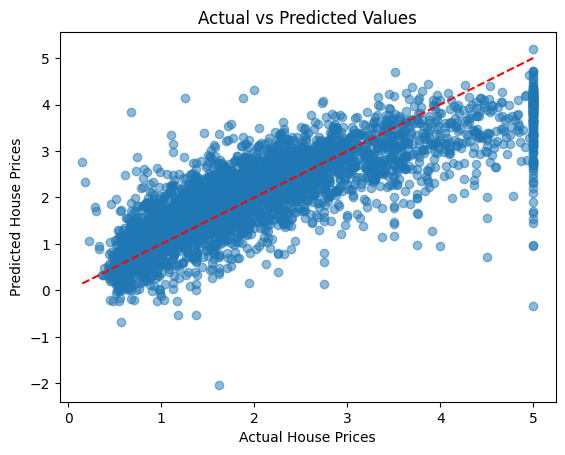

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Values")
plt.show()
